In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Prince\Downloads\census+income\adult.data",header = None)

In [3]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
#Lets take only a small subset of dataset
df = df.iloc[:2000,:]

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

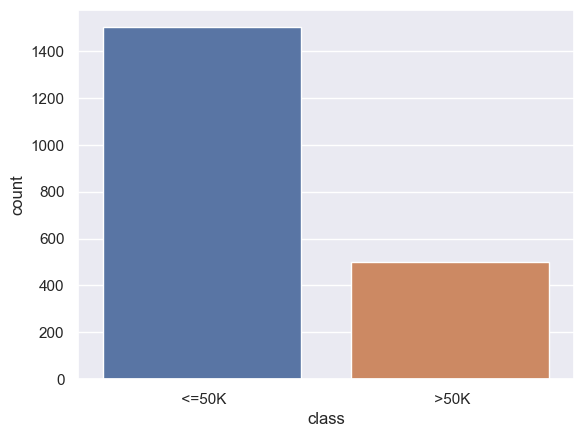

In [8]:
sns.set()
sns.countplot(data = df,x = 'class')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2000 non-null   int64 
 1   workclass       2000 non-null   object
 2   fnlwgt          2000 non-null   int64 
 3   education       2000 non-null   object
 4   education-num   2000 non-null   int64 
 5   marital-status  2000 non-null   object
 6   occupation      2000 non-null   object
 7   relationship    2000 non-null   object
 8   race            2000 non-null   object
 9   sex             2000 non-null   object
 10  capital-gain    2000 non-null   int64 
 11  capital-loss    2000 non-null   int64 
 12  hours-per-week  2000 non-null   int64 
 13  native-country  2000 non-null   object
 14  class           2000 non-null   object
dtypes: int64(6), object(9)
memory usage: 234.5+ KB


In [11]:
#Storing categorical variables
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
categorical_features  =[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [12]:
#Encoding the categorical variables using labelencoding
for column in categorical_features:
    df[column] = label_encode.fit_transform(df[column])

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6,77516,9,13,4,1,1,4,1,2174,0,40,35,0
1,50,5,83311,9,13,2,4,0,4,1,0,0,13,35,0
2,38,3,215646,11,9,0,6,1,4,1,0,0,40,35,0
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,35,0
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [14]:
#checking the target variable
df['class'].value_counts()

0    1501
1     499
Name: class, dtype: int64

### Since the category of <=50k is comparitively more than >50k we have to handle it

### Oversampling

In [15]:
from sklearn.utils import resample
#separating dataset into features X and y target variable
X = df.drop(columns="class")
y = df['class']
#splitting majority and minority class
df_majority = X[y==0]
df_minority = X[y==1]

#Upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,random_state=42,n_samples=1501)
#combine the minority class with majority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
X = df_upsampled
#updating the target variable accordingly
y = [0]*len(df_majority)+[1]*len(df_minority_upsampled)
y = pd.Series(y)

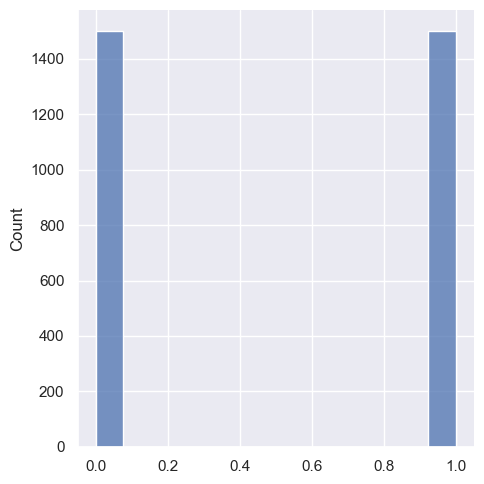

In [16]:
sns.set()
sns.displot(y)

In [17]:
df_minority_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 435 to 763
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1501 non-null   int64
 1   workclass       1501 non-null   int32
 2   fnlwgt          1501 non-null   int64
 3   education       1501 non-null   int32
 4   education-num   1501 non-null   int64
 5   marital-status  1501 non-null   int32
 6   occupation      1501 non-null   int32
 7   relationship    1501 non-null   int32
 8   race            1501 non-null   int32
 9   sex             1501 non-null   int32
 10  capital-gain    1501 non-null   int64
 11  capital-loss    1501 non-null   int64
 12  hours-per-week  1501 non-null   int64
 13  native-country  1501 non-null   int32
dtypes: int32(8), int64(6)
memory usage: 129.0 KB


In [18]:
# Standardizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
scaler.fit_transform(X[numerical_features])

array([[-1.06325327,  0.96752872,  0.0176289 , -0.2563401 , -0.20192504],
       [-1.00880271,  0.96752872, -0.19687016, -0.2563401 , -2.4163523 ],
       [ 0.23463394, -0.60887357, -0.19687016, -0.2563401 , -0.20192504],
       ...,
       [-1.00333416, -0.60887357, -0.19687016, -0.2563401 , -0.20192504],
       [-1.50903379, -0.60887357, -0.19687016,  3.70072211,  1.43839146],
       [-0.58634338,  2.14983044, -0.19687016, -0.2563401 ,  2.2585497 ]])

In [19]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

### Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred_log_reg = log_reg.predict(X_test)
score = accuracy_score(y_test,y_pred_log_reg)
score

0.6403995560488346

### SVC Model

In [20]:
#Building up SVC model
from sklearn.svm import SVC
svc  = SVC()
svc.fit(X_train,y_train)

SVC()

In [21]:
y_pred = svc.predict(X_test)

In [22]:
#checking out the accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.5238623751387348

### Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred_DTC = DTC.predict(X_test)

In [28]:
score_DTC = accuracy_score(y_test,y_pred_DTC)
score

0.5238623751387348

### Bagging Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier
model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=42,n_jobs=-1) 
classifier = model_bagging_svc.fit(X_train,y_train)

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [24]:
y_pred2 = classifier.predict(X_test)

In [25]:
score2  = accuracy_score(y_test,y_pred2)
score

0.5238623751387348

### Extra Tree Classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(criterion = 'entropy',n_estimators=100, random_state=0)
ETC.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred_ETC = ETC.predict(X_test)

In [37]:
score_ETC = accuracy_score(y_test,y_pred_ETC)
score

0.5238623751387348

### Voting Classifier

In [40]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('lg',log_reg),('svc',svc),('dt',DTC)],voting = 'hard')

In [41]:
VC.fit(X_train,y_train)

VotingClassifier(estimators=[('lg', LogisticRegression()), ('svc', SVC()),
                             ('dt', DecisionTreeClassifier())])

In [42]:
y_pred_VC = VC.predict(X_test)

In [44]:
score = accuracy_score(y_test,y_pred_VC)
score

0.7336293007769146

### On comparison among all the Bagging models and different Classifier Techniques Voting Classifier has given the highest accuracy among them all, i.e 73.36%